In [8]:
#k-mean clustering
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Importing the dataset
df=pd.read_csv(r"D:\Mall_Customers.csv", index_col = 0, header=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [14]:
print(df.shape)
print(df.info())

(200, 4)
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None


In [26]:
print(df.isnull().sum())
df.describe(include="all")

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [34]:
df.boxplot(column="Annual Income (k$)")

<Axes: >

In [36]:
#df.head()

In [38]:
X = df.values[:,[2,3]]# this indicates that Annual Income & Spending Score variables used

In [40]:
X

array([[15, 39],
       [15, 81],
       [16, 6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18, 6],
       [18, 94],
       [19, 3],
       [19, 72],
       [19, 14],
       [19, 99],
       [20, 15],
       [20, 77],
       [20, 13],
       [20, 79],
       [21, 35],
       [21, 66],
       [23, 29],
       [23, 98],
       [24, 35],
       [24, 73],
       [25, 5],
       [25, 73],
       [28, 14],
       [28, 82],
       [28, 32],
       [28, 61],
       [29, 31],
       [29, 87],
       [30, 4],
       [30, 73],
       [33, 4],
       [33, 92],
       [33, 14],
       [33, 81],
       [34, 17],
       [34, 73],
       [37, 26],
       [37, 75],
       [38, 35],
       [38, 92],
       [39, 36],
       [39, 61],
       [39, 28],
       [39, 65],
       [40, 55],
       [40, 47],
       [40, 42],
       [40, 42],
       [42, 52],
       [42, 60],
       [43, 54],
       [43, 60],
       [43, 45],
       [43, 41],
       [44, 50],
       [44, 46],
       [46, 51],
   

In [46]:
import warnings 
warnings.filterwarnings("ignore")

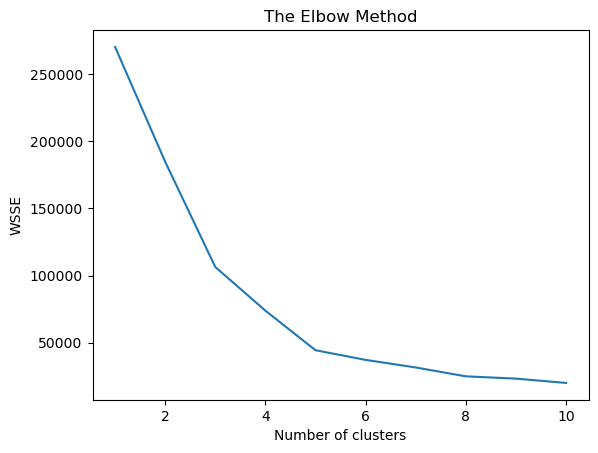

In [50]:
#This is generic code
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
 
wsse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,  random_state = 10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)#
plt.plot(range(1, 11), wsse)
#plt.scatter(range(1, 11),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()


In [52]:
print(wsse)

[269981.28, 184609.9843409062, 106348.37306211119, 73880.64496247195, 44448.45544793371, 37265.86520484346, 31632.259809473475, 25038.83620868515, 23337.40705378208, 20137.434537925845]


In [54]:
#Fitting K-mean to the dataset
kmeans = KMeans(n_clusters = 5, random_state = 10)
Y_pred = kmeans.fit_predict(X)

#kmeans.fit(X)-->training
#Y_pred=kmeans.predict(X)-->predicting


In [56]:
Y_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [58]:
kmeans.inertia_ #to check the inertia of the, 

44448.45544793371

In [62]:
kmeans.n_iter_ #it automatically cptures how many iterations it has done

7

In [68]:
df["Clusters"]=Y_pred
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,4
2,Male,21,15,81,2
3,Female,20,16,6,4
4,Female,23,16,77,2
5,Female,31,17,40,4
6,Female,22,17,76,2
7,Female,35,18,6,4
8,Female,23,18,94,2
9,Male,64,19,3,4


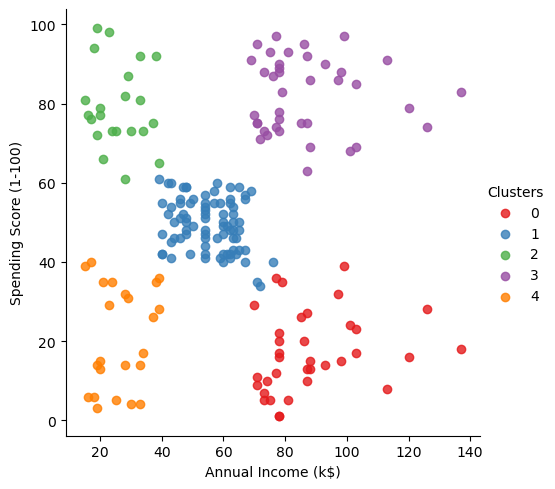

In [82]:
sns.lmplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
           fit_reg=False, # No regression line
           hue='Clusters',palette="Set1")  
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
#s = 300, c = 'black')
plt.show()

In [105]:
kmeans.n_clusters

5

In [107]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

In [109]:
df["Clusters"]=df.Clusters.replace({0:"Carefull",1:"Standard",2:"Careless",3:"Target",4:"Sensible"})

In [111]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters,Cluster
CustomerID,,,,,,
1,Male,19,15,39,Sensible,Sensible
2,Male,21,15,81,Careless,Careless
3,Female,20,16,6,Sensible,Sensible
4,Female,23,16,77,Careless,Careless
5,Female,31,17,40,Sensible,Sensible


In [117]:
df.drop("Cluster", axis=1, inplace=True)

In [119]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,Sensible
2,Male,21,15,81,Careless
3,Female,20,16,6,Sensible
4,Female,23,16,77,Careless
5,Female,31,17,40,Sensible


In [121]:
df.Clusters.value_counts()

Clusters
Standard    81
Target      39
Carefull    35
Sensible    23
Careless    22
Name: count, dtype: int64

In [123]:
new_df=df[df["Clusters"]=="Target"]#fetcing only the target clusters

In [125]:
new_df.shape

(39, 5)

In [129]:
new_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
124,Male,39,69,91,Target
126,Female,31,70,77,Target
128,Male,40,71,95,Target
130,Male,38,71,75,Target
132,Male,39,71,75,Target


In [138]:
new_df.to_excel(r"TargetCustomers.xlsx",index=True)#this will convert the file to excel and then we can send this file to the client

In [140]:
import os
os.getcwd()

'C:\\Users\\vinay\\Documents\\PGA-35 Data analyst classes\\project'